In [14]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("ticks")
sns.set_context(font_scale=1.2,context='paper')
sns.set_context({"figure.figsize": (12, 12)})

In [15]:
import pandas as pd
from random import seed
import random as rm
import numpy as np
import pyemma

from tqdm.notebook import tqdm  # progress bar

In [16]:
import deeptime
deeptime.__version__

'0.4.4'

In [17]:
class Dimer(object):
    def __init__(self, index):
        self.index = index
        self._trajectory_states = []
        self._state = self.states[0]
    
    def state_to_features(self):
        if self._state == "CC":
            return np.asarray([0.9, 0.1, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "OC":
            return np.asarray([0.1, 0.9, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "CO":
            return np.asarray([0.9, 0.1, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "OO":
            return np.asarray([0.1, 0.9, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "CD":
            return np.asarray([0.9, 0.1, 0.6, 0.1, 0.4, 0.6])
        elif self._state == "OD":
            return np.asarray([0.1, 0.9, 0.6, 0.1, 0.4, 0.6])
        elif self._state == "DC":
            return np.asarray([0.1, 0.4, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "DO":
            return np.asarray([0.1, 0.4, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "DD":
            return np.asarray([0.1, 0.4, 0.6, 0.1, 0.4, 0.6])
            
        
    def run(self, step):
        self._trajectory = np.zeros([step, 6])
        
        # Init state CC
        self._state = self.states[0]
        self._trajectory_states.append(self.state) 
        self._trajectory[0] = self.state_to_features()
        
        for i in range(1, step):
            if i % 5 == 0:
                self.propagate()
                
            self._trajectory_states.append(self.state) 
            self._trajectory[i] = self.state_to_features()

            
        noise = np.random.normal(0, .01, self._trajectory.shape)
        self._trajectory = self._trajectory + noise
        
    @property
    def state(self):
        return self._state
    
    @property
    def trajectory(self):
        return self._trajectory
    
    @property
    def trajectory_states(self):
        return self._trajectory_states
    
    def propagate(self):
        state_ind = self.states.index(self.state)
        transition = np.random.choice(self.transitionName[state_ind],
                                      replace=True,
                                      p=self.transitionMatrix[state_ind])
        self._state = transition.split('_')[1]
        
    # The statespace
    states = ["CC","OC","CO", "OO", "CD", "OD", "DC", "DO", "DD"]
    
    single_states = ["C", "O", "D"]


    # Possible sequences of events
    transitionName = [["CC_CC", "CC_OC", "CC_CO", "CC_OO", "CC_CD", "CC_OD", "CC_DC", "CC_DO", "CC_DD"],
                      ["OC_CC", "OC_OC", "OC_CO", "OC_OO", "OC_CD", "OC_OD", "OC_DC", "OC_DO", "OC_DD"],
                      ["CO_CC", "CO_OC", "CO_CO", "CO_OO", "CO_CD", "CO_OD", "CO_DC", "CO_DO", "CO_DD"],
                      ["OO_CC", "OO_OC", "OO_CO", "OO_OO", "OO_CD", "OO_OD", "OO_DC", "OO_DO", "OO_DD"],
                      ["CD_CC", "CD_OC", "CD_CO", "CD_OO", "CD_CD", "CD_OD", "CD_DC", "CD_DO", "CD_DD"],
                      ["OD_CC", "OD_OC", "OD_CO", "OD_OO", "OD_CD", "OD_OD", "OD_DC", "OD_DO", "OD_DD"],
                      ["DC_CC", "DC_OC", "DC_CO", "DC_OO", "DC_CD", "DC_OD", "DC_DC", "DC_DO", "DC_DD"],
                      ["DO_CC", "DO_OC", "DO_CO", "DO_OO", "DO_CD", "DO_OD", "DO_DC", "DO_DO", "DO_DD"],
                      ["DD_CC", "DD_OC", "DD_CO", "DD_OO", "DD_CD", "DD_OD", "DD_DC", "DD_DO", "DD_DD"],
                     ]

    # Probabilities matrix (transition matrix)
    transitionMatrix = [[0.6, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  #CC
                        [0.1, 0.3, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0],  #OC
                        [0.1, 0.0, 0.3, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0],  #CO
                        [0.0, 0.1, 0.1, 0.4, 0.0, 0.2, 0.0, 0.2, 0.0],  #OO
                        [0.2, 0.0, 0.1, 0.0, 0.2, 0.1, 0.0, 0.0, 0.4],  #CD
                        [0.0, 0.3, 0.0, 0.1, 0.2, 0.2, 0.0, 0.0, 0.2],  #OD
                        [0.2, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.4],  #DC
                        [0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.2, 0.2, 0.2],  #DO
                        [0.0, 0.0, 0.0, 0.0, 0.15, 0.1, 0.15, 0.1, 0.5] #DD
                       ]

In [18]:
glic_dimer = Dimer(0)

In [19]:
glic_dimer.run(50000)

Text(69.91666666666667, 0.5, 'From')

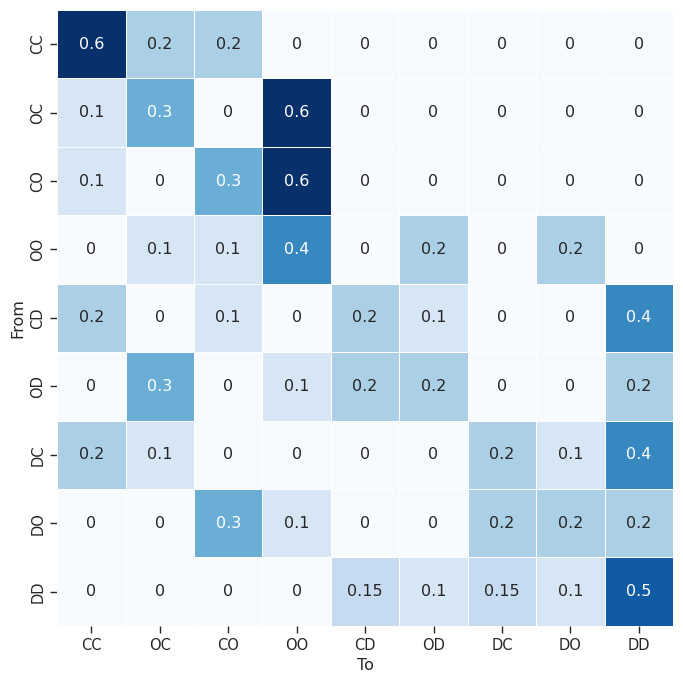

In [20]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(glic_dimer.transitionMatrix,
            ax=ax,
            xticklabels=glic_dimer.states,
            yticklabels=glic_dimer.states,
            annot=True,
            cmap="Blues",
            cbar=False,
            square=True,
            linewidths=0.5,
            )

ax.set_xlabel("To")
ax.set_ylabel("From")
#plt.savefig("assets/transition_matrix_dimer.pdf", dpi=300, transparent=True)

In [21]:
from deeptime.markov import pcca

In [22]:
from typing import Optional, List
from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

class MultimerTrajectoriesDataset(TrajectoriesDataset):
    def __init__(self, multimer: int, data: List[TrajectoryDataset]):
        self.multimer = multimer
        super().__init__(data)

    @staticmethod
    def from_numpy(lagtime, multimer, data: List[np.ndarray]):
        assert isinstance(data, list)
        assert len(data) > 0 and all(data[0].shape[1:] == x.shape[1:] for x in data), "Shape mismatch!"

        data_new = []
        total_shape = data[0].shape[1]
        per_shape = int(total_shape / multimer)

        for i in range(multimer):
            data_new.extend(
                [np.roll(traj.reshape(traj.shape[0], multimer, per_shape),
                                                i, axis=1).reshape(traj.shape[0],total_shape)
                for traj in data])
        return MultimerTrajectoriesDataset(multimer, [TrajectoryDataset(lagtime, traj) for traj in data_new])

In [23]:
from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

data = [glic_dimer.trajectory.astype(np.float32)]
dataset = MultimerTrajectoriesDataset.from_numpy(5, 2, data)

In [24]:
from deeptime.decomposition import TICA

tica = TICA(var_cutoff=None, lagtime=5)

tica.fit(dataset)

tica_output= [tica.transform(traj) for traj in dataset.trajectories]
tica_concatenated= np.concatenate(tica_output)

tica_model_tica = tica.fetch_model()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


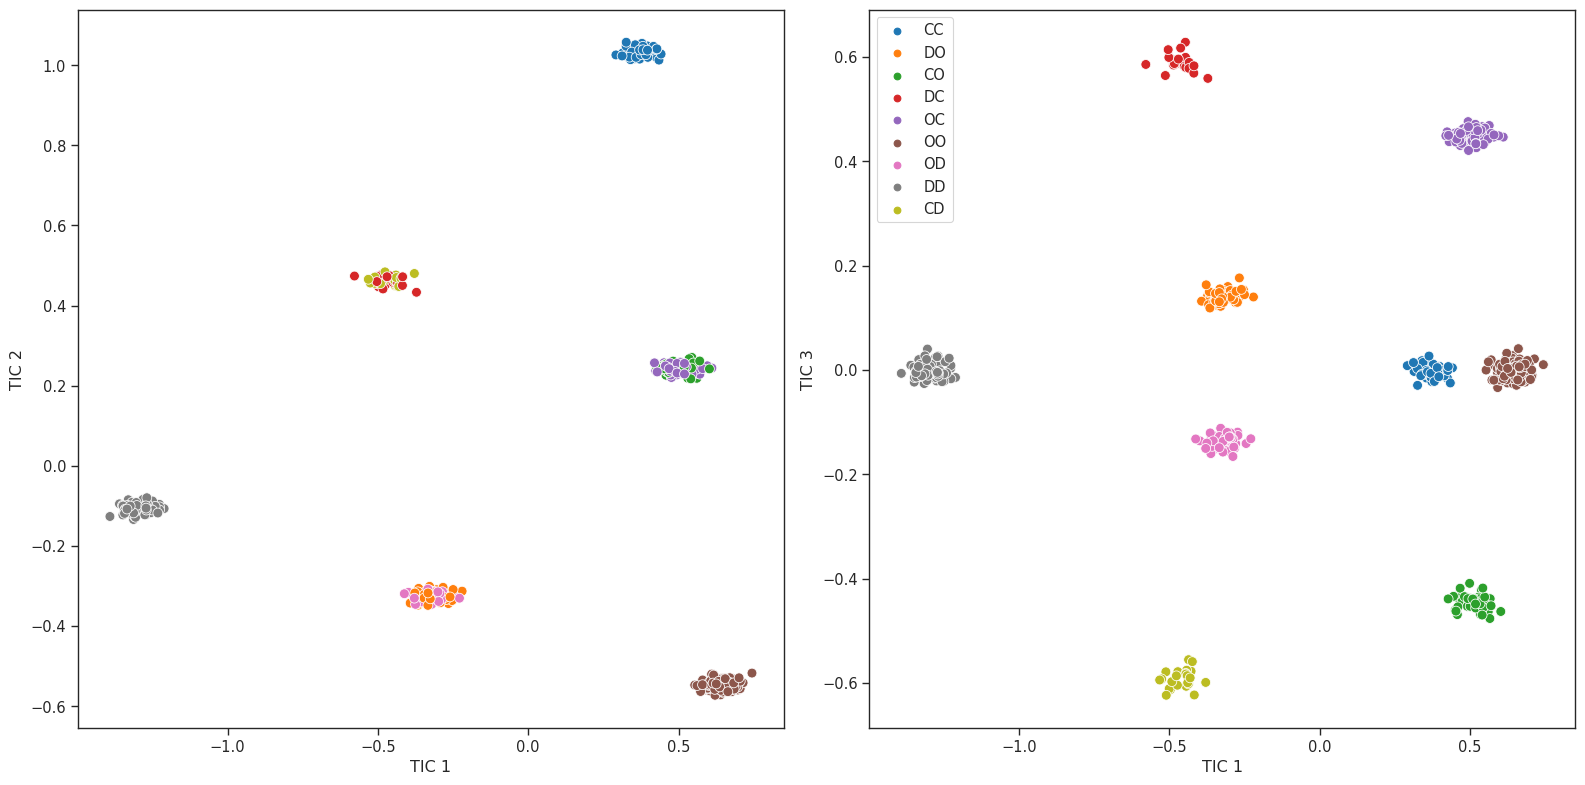

In [25]:
feature = dataset.trajectories[0]
feature_transformed = tica.transform(feature)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.scatterplot(
            x=feature_transformed[::100, 0],
            y=feature_transformed[::100, 1],
            hue=glic_dimer.trajectory_states[::100],
            s=50, alpha=1, ax=axes[0], legend=False)

axes[0].set_xlabel("TIC 1")
axes[0].set_ylabel("TIC 2")
sns.scatterplot(
            x=feature_transformed[::100, 0],
            y=feature_transformed[::100, 3],
            hue=glic_dimer.trajectory_states[::100],
            s=50, alpha=1, ax=axes[1])

axes[1].set_xlabel("TIC 1")
axes[1].set_ylabel("TIC 3")

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#plt.savefig("assets/tica_dimer.pdf", dpi=300, transparent=True)

In [26]:
from deeptime.clustering import KMeans, RegularSpace

kmean = KMeans(
                n_clusters=9,
                init_strategy='kmeans++',
                max_iter=300,
                n_jobs=24,
                progress=tqdm)

In [27]:
cluster = kmean.fit(np.concatenate(tica_output)[::300, :3]).fetch_model()
dtrajs = [cluster.transform(traj[:, :3]) for traj in tica_output]
dtrajs_concatenated = np.concatenate(dtrajs)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [28]:
cluster_centers = cluster.cluster_centers

estimating BayesianMSM:   0%|          | 0/6 [00:00<?, ?it/s]

21-03-23 13:56:01 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[7] WARNING  Changed user setting nits to the number of available timescales nits=8


<Axes: xlabel='lag time / step', ylabel='timescale / step'>

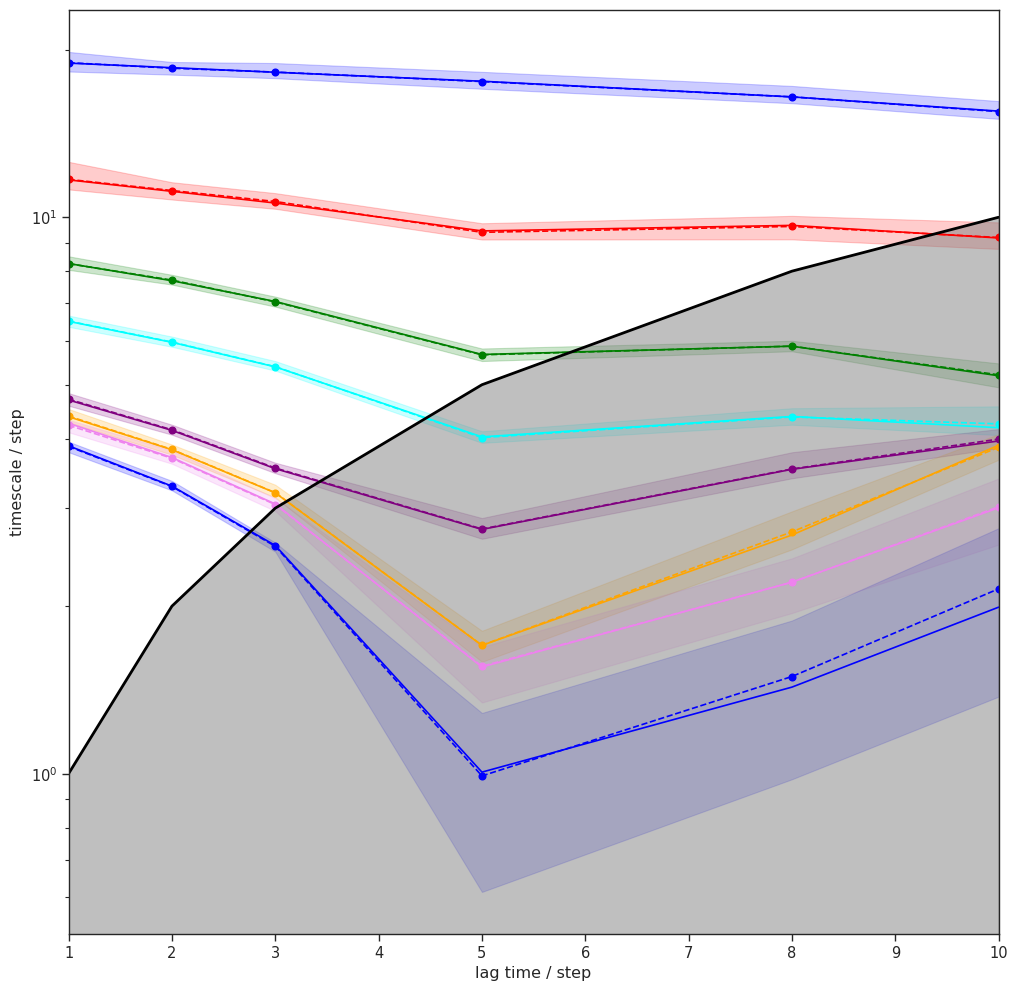

In [29]:
its = pyemma.msm.its(dtrajs, lags=10, nits=10, errors='bayes', n_jobs=1)
pyemma.plots.plot_implied_timescales(its, units='step', dt=1)

In [30]:
from sym_msm.msm.sym_transition import SymTransitionCountEstimator
lag = 5
from deeptime.markov.msm import BayesianMSM, MaximumLikelihoodMSM

counts = SymTransitionCountEstimator(lagtime=lag,
                                     multimer=2,
                                     count_mode='effective').fit_fetch(dtrajs)
msm = BayesianMSM(n_samples=100).fit(counts)

msm_model = msm.fetch_model()

from deeptime.markov.tools.analysis import stationary_distribution

pi_samples = []
traj_weights_samples = []
for sample in msm_model.samples:
    pi_samples.append(stationary_distribution(sample.transition_matrix))
    traj_weights_samples.append(sample.compute_trajectory_weights(dtrajs))

pi_samples = np.array(pi_samples, dtype=object)
traj_weights_samples = np.array(traj_weights_samples, dtype=object)

stationary_distribution = np.mean(pi_samples, axis=0)
pi = stationary_distribution
trajectory_weights = np.mean(traj_weights_samples, axis=0)

In [31]:
n_states = 9

lagtimes = np.arange(1, 7+1) * lag

print('Estimating lagtimes', lagtimes)

models = []
for lagtime in tqdm(lagtimes, desc='lagtime', total=len(lagtimes)):
    counts = SymTransitionCountEstimator(lagtime=lagtime,
                                         multimer=2,
                                         count_mode='effective').fit_fetch(dtrajs)
    models.append(BayesianMSM(n_samples=100).fit_fetch(counts))

ck_test = models[0].ck_test(models, n_states, progress=tqdm)

Estimating lagtimes [ 5 10 15 20 25 30 35]


lagtime:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

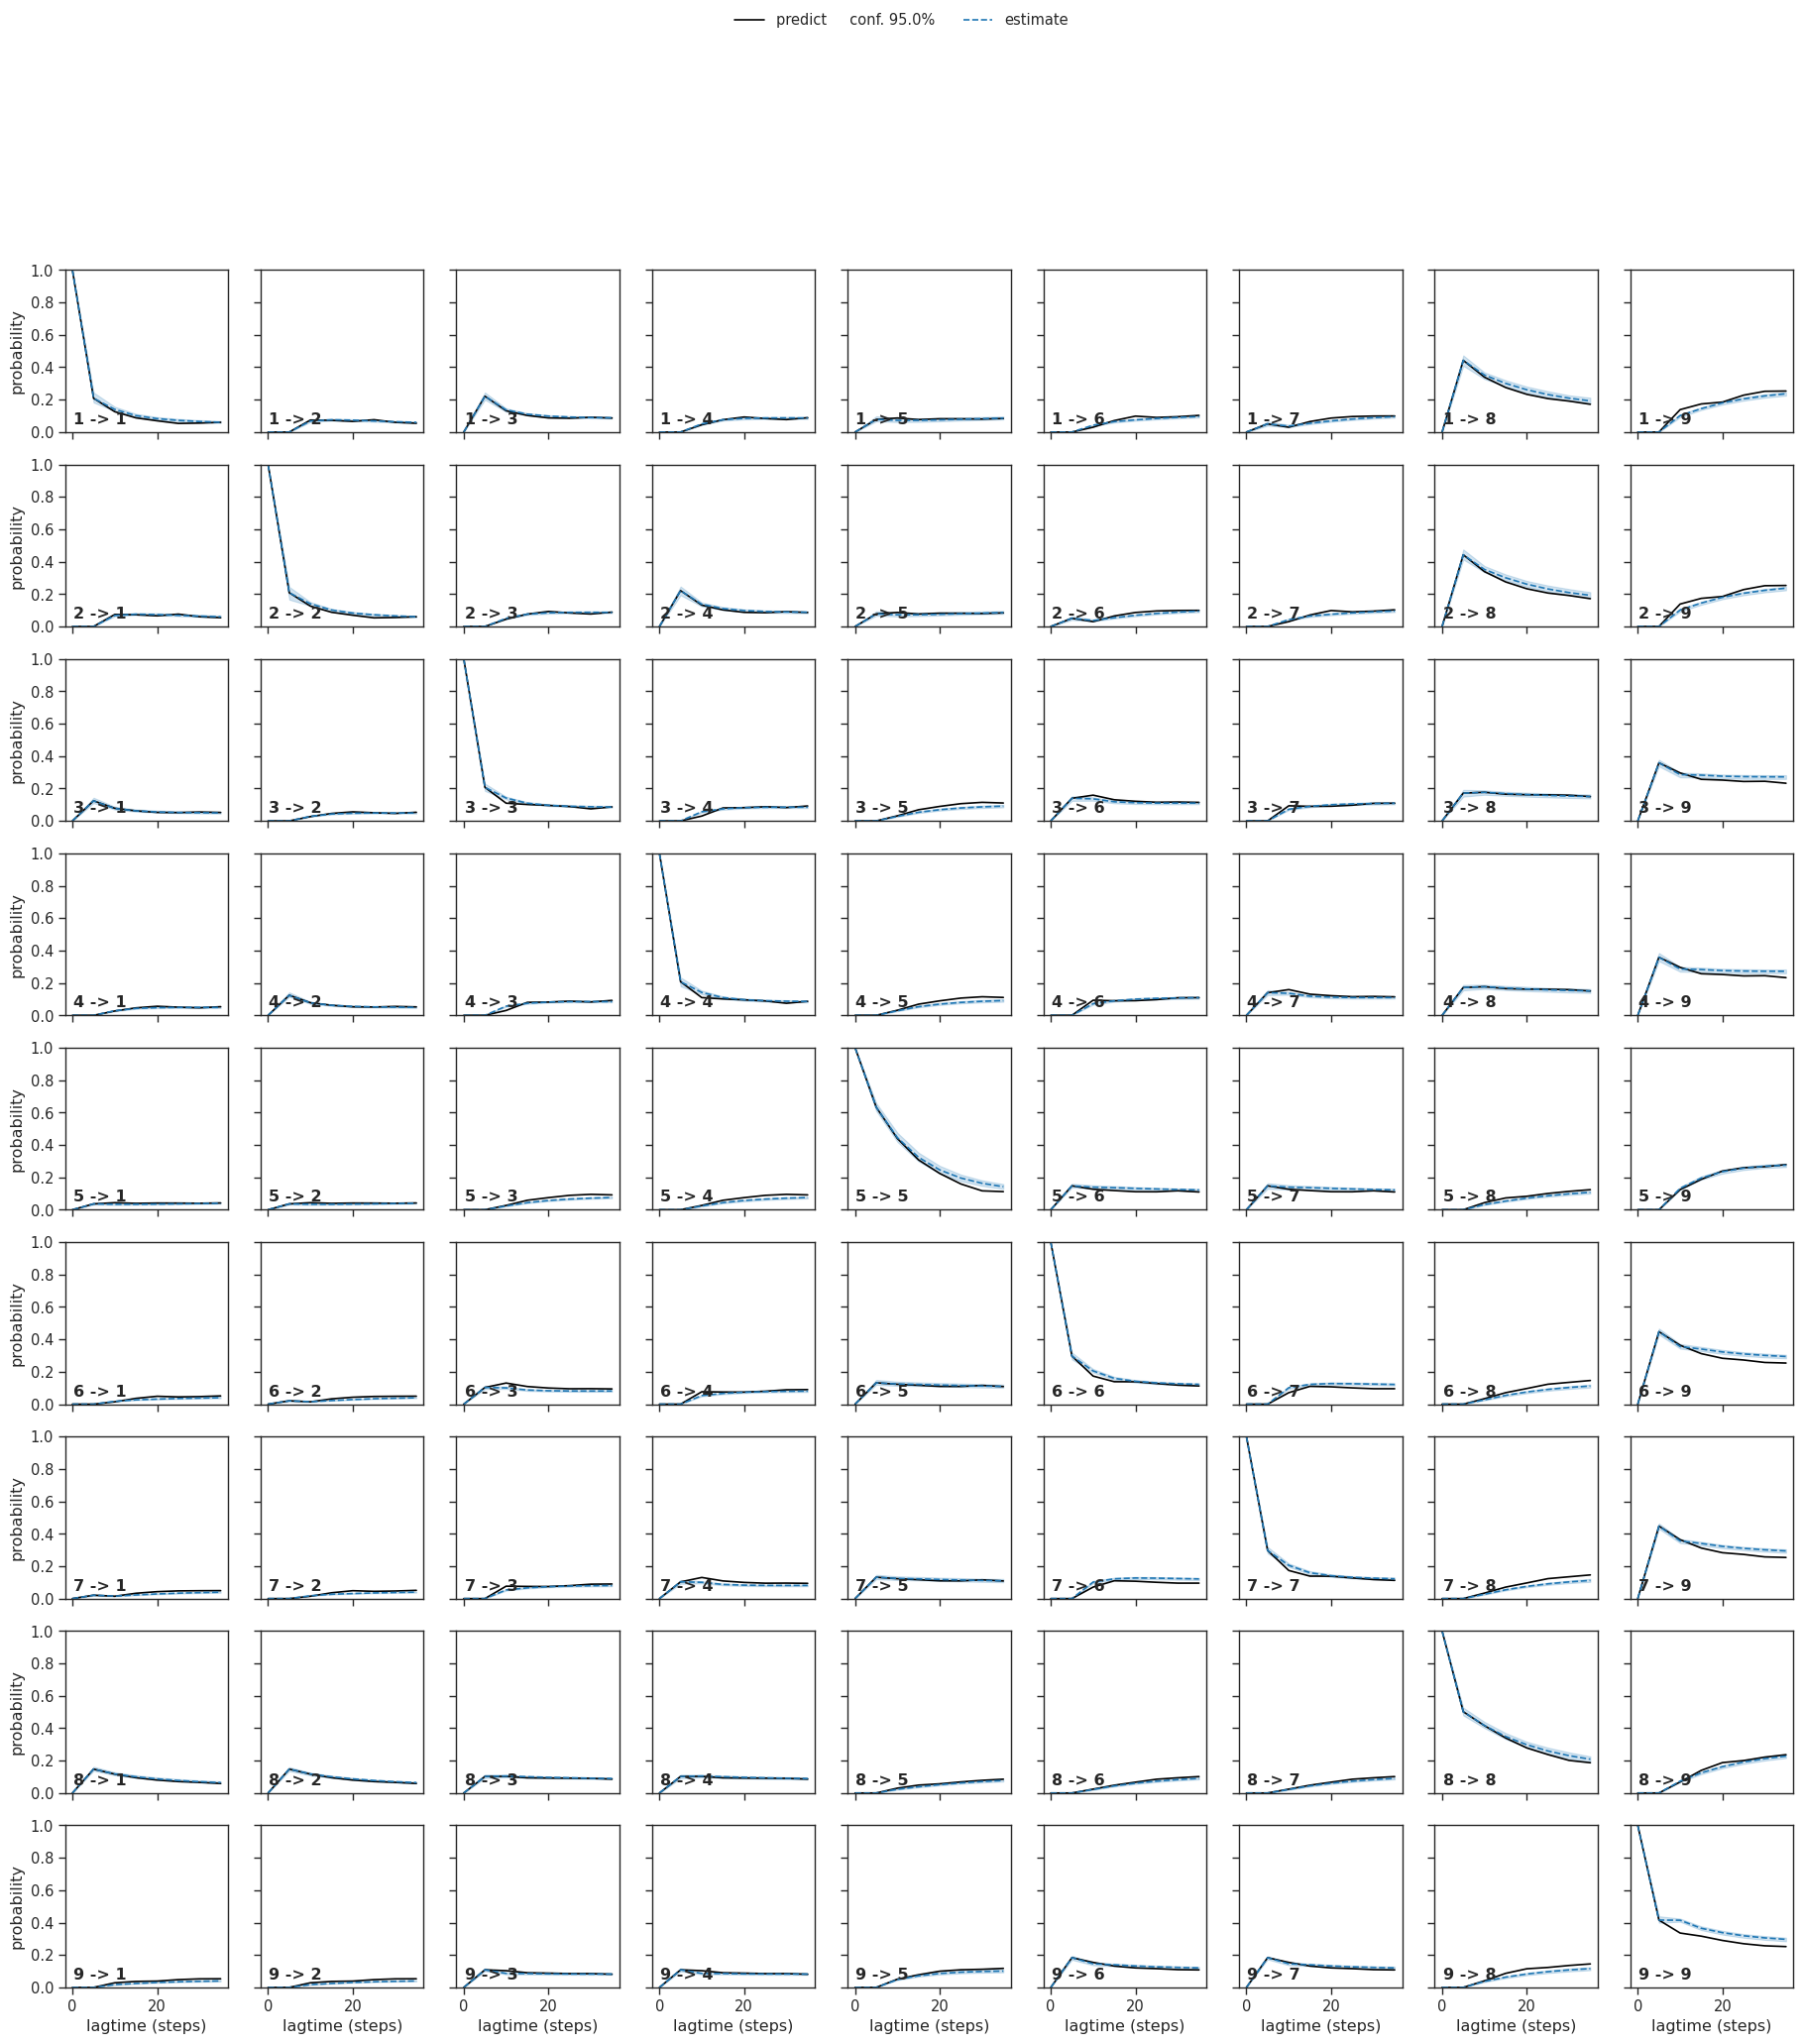

In [28]:
from deeptime.plots import plot_implied_timescales, plot_ck_test

plot_ck_test(ck_test)

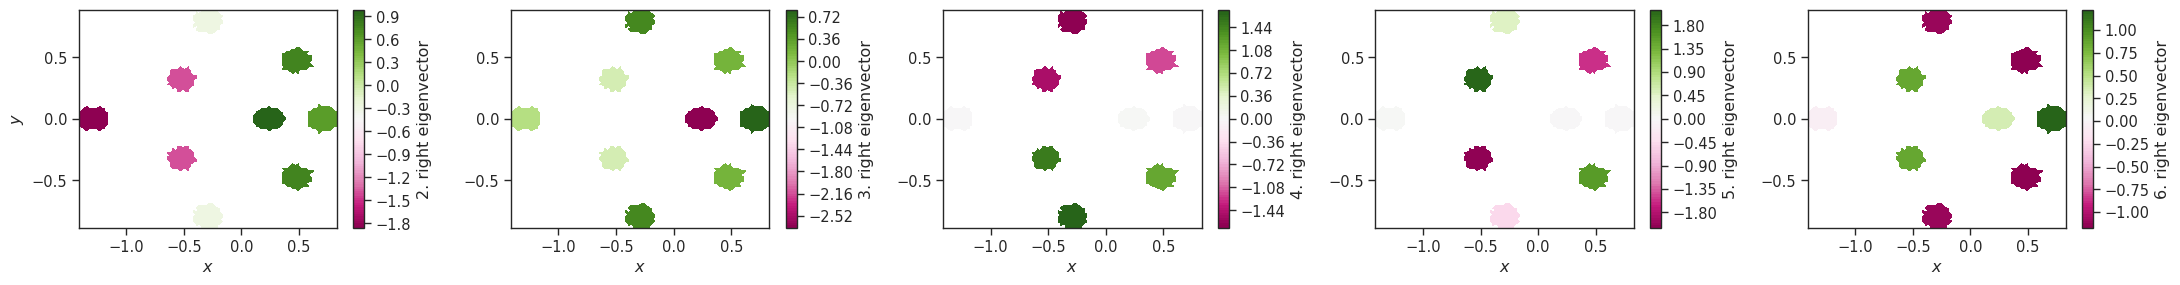

In [29]:
eigvec = msm_model.prior.eigenvectors_right()
fig, axes = plt.subplots(1, 5, figsize=(22, 3))
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated.T[[0,2]], eigvec[dtrajs_concatenated, i + 1], ax=ax, cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2), mask=True)
    ax.set_xlabel('$x$')
axes[0].set_ylabel('$y$')
fig.tight_layout()

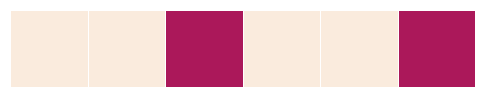

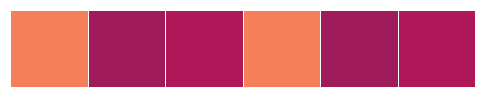

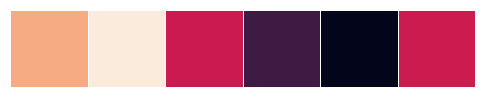

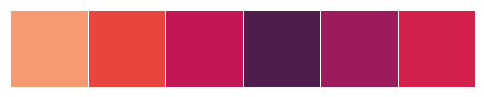

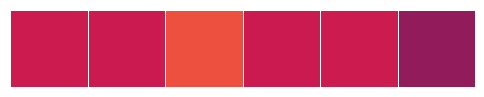

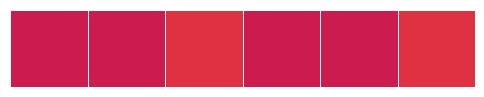

In [30]:
for i in range(6):
    fig, ax = plt.subplots(figsize=(6,1))
    sns.heatmap(tica_model_tica.instantaneous_coefficients.T[i].reshape(1, -1),
                ax=ax,
                linewidths=0.5,
                cbar=False,
                xticklabels='',
                yticklabels='',
                vmax=1.5,
                vmin=-1.5)
#    plt.savefig(f"assets/dimer_tica_{i}.pdf", dpi=300, transparent=True)

In [32]:
from sym_msm.decomposition.sym_tica import SymTICA

symtica = SymTICA(symmetry_fold=2, var_cutoff=0.8, lagtime=5, scaling=None)

symtica.fit(dataset)

symtica_output= symtica.transform(dataset.trajectories[0])
symtica_concatenated= np.concatenate(symtica_output)

symmetry_fold 2


In [33]:
symtica_model_tica = symtica.fetch_model()

NameError: name 'set_axis_boarder' is not defined

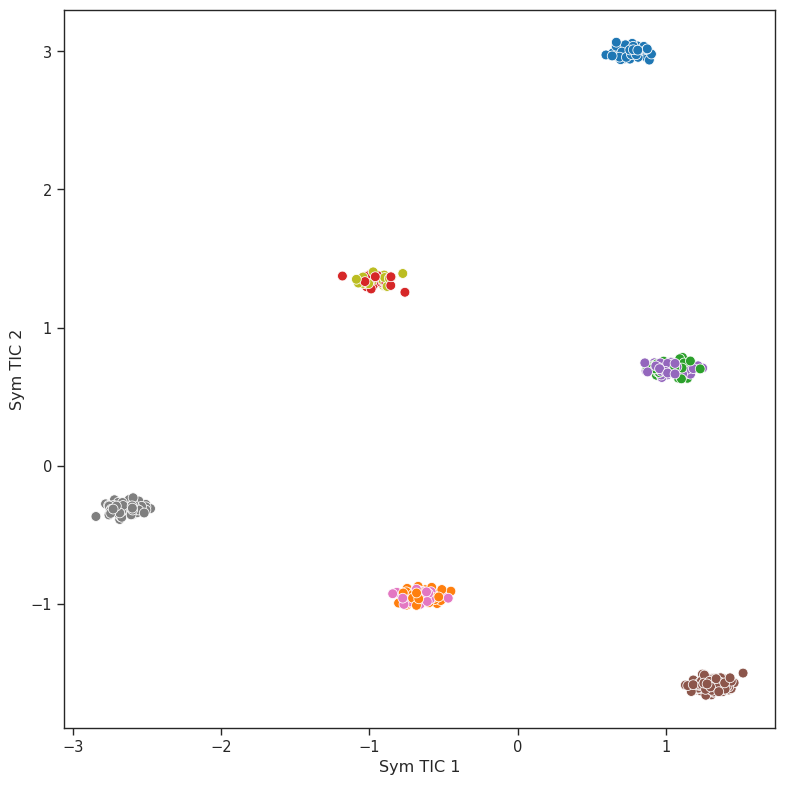

In [34]:
feature = dataset.trajectories[0]
feature_transformed = np.real(symtica.transform(feature))
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.scatterplot(
            x=feature_transformed[::100, 0],
            y=feature_transformed[::100, 1],
            hue=glic_dimer.trajectory_states[::100],
            s=50, alpha=1, ax=ax, legend=False)

ax.set_xlabel("Sym TIC 1")
ax.set_ylabel("Sym TIC 2")
#plt.legend(loc='upper right')
plt.tight_layout()
set_axis_boarder(ax)
plt.savefig("assets/dimer_sym_tica.pdf", dpi=300, transparent=True)

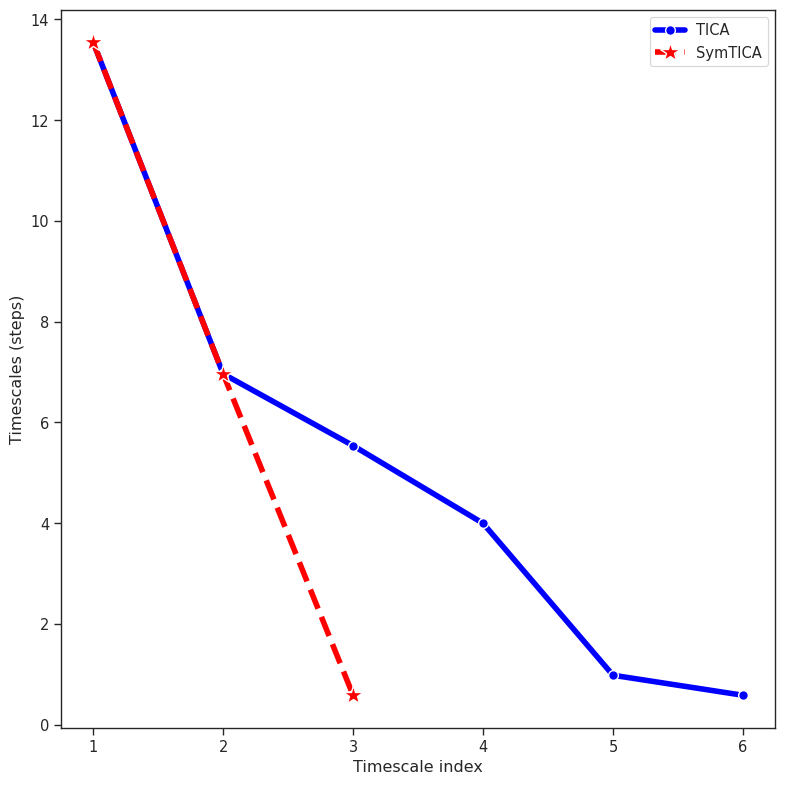

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
n_timescales=100

ax.plot(np.arange(1, tica_model_tica.timescales(k=n_timescales).shape[0]+1),
        tica_model_tica.timescales(k=n_timescales),
             marker='o',
             linestyle='-',
             linewidth=4,
             color='blue',
             markersize=7,
             markeredgecolor='white',
             label='TICA')
ax.plot(np.arange(1, symtica_model_tica.timescales(k=n_timescales).shape[0]+1),
             symtica_model_tica.timescales(k=n_timescales),
             marker='*',
             linestyle='--',
             linewidth=4,
             color='red',
             markersize=15,
             markeredgecolor='white',
            label='SymTICA')


ax.set_ylabel('Timescales (steps)')
ax.set_xlabel('Timescale index')
plt.legend(loc='upper right')
plt.tight_layout()
#plt.savefig("assets/dimer_timescales.pdf", dpi=300, transparent=True)

In [36]:
from deeptime.clustering import KMeans, RegularSpace

kmean = KMeans(
                n_clusters=6,
                init_strategy='kmeans++',
                max_iter=300,
                n_jobs=24,
                progress=tqdm)

In [37]:
cluster = kmean.fit(symtica_output).fetch_model()

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [38]:
dtrajs = cluster.transform(symtica_output)

In [39]:
cluster_centers = cluster.cluster_centers

estimating BayesianMSM:   0%|          | 0/6 [00:00<?, ?it/s]

21-03-23 13:56:48 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[14] WARNING  Changed user setting nits to the number of available timescales nits=5


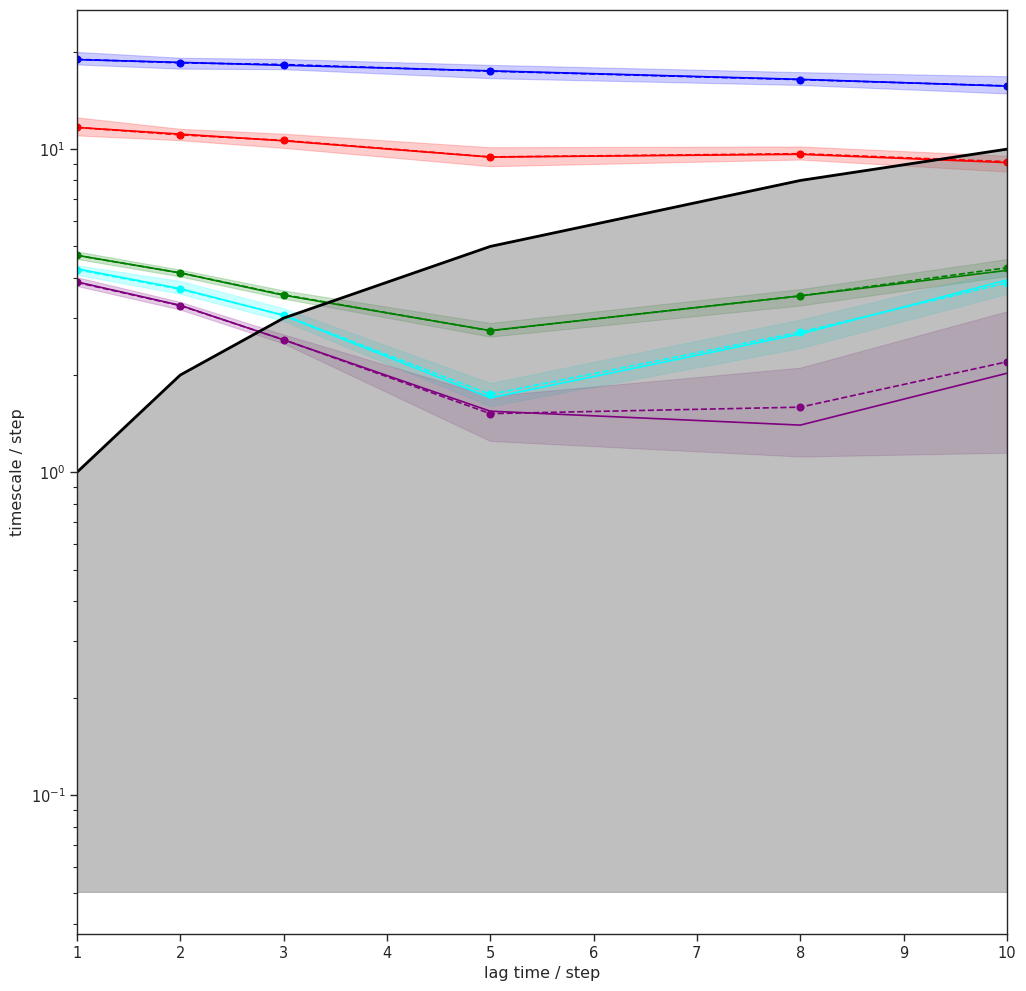

In [40]:
its = pyemma.msm.its(dtrajs, lags=10, nits=10, errors='bayes', n_jobs=1)
pyemma.plots.plot_implied_timescales(its, units='step', dt=1);

In [24]:
from deeptime.markov import TransitionCountEstimator
lag = 5
from deeptime.markov.msm import BayesianMSM, MaximumLikelihoodMSM

counts = TransitionCountEstimator(lagtime=lag,
                                  count_mode='effective').fit_fetch(dtrajs)
msm = BayesianMSM(n_samples=100).fit(counts)

msm_model = msm.fetch_model()

from deeptime.markov.tools.analysis import stationary_distribution

pi_samples = []
traj_weights_samples = []
for sample in msm_model.samples:
    pi_samples.append(stationary_distribution(sample.transition_matrix))
    traj_weights_samples.append(sample.compute_trajectory_weights(dtrajs))

pi_samples = np.array(pi_samples, dtype=object)
traj_weights_samples = np.array(traj_weights_samples, dtype=object)

stationary_distribution = np.mean(pi_samples, axis=0)
pi = stationary_distribution
trajectory_weights = np.mean(traj_weights_samples, axis=0)

In [37]:
n_states = 6

lagtimes = np.arange(1, 7+1) * lag

print('Estimating lagtimes', lagtimes)

models = []
for lagtime in tqdm(lagtimes, desc='lagtime', total=len(lagtimes)):
    counts = TransitionCountEstimator(lagtime=lagtime, count_mode='effective').fit_fetch(dtrajs)
    models.append(BayesianMSM(n_samples=100).fit_fetch(counts))

ck_test = models[0].ck_test(models, n_states, progress=tqdm)

Estimating lagtimes [ 5 10 15 20 25 30 35]


lagtime:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

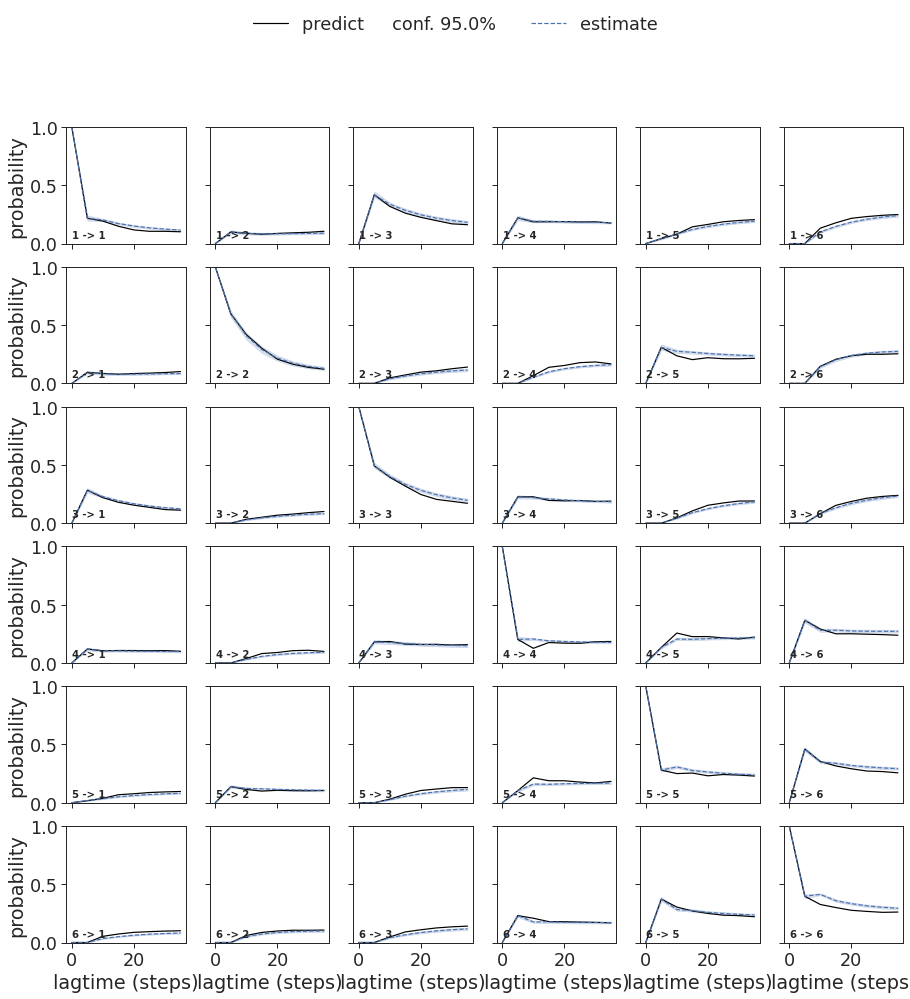

In [38]:
from deeptime.plots import plot_implied_timescales, plot_ck_test

plot_ck_test(ck_test)

<AxesSubplot: >

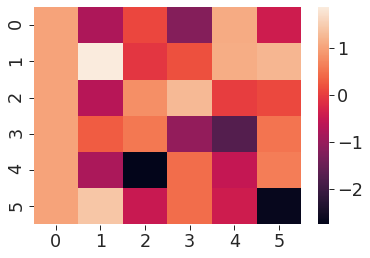

In [40]:
sns.heatmap(msm_model.prior.eigenvectors_right())

<AxesSubplot: >

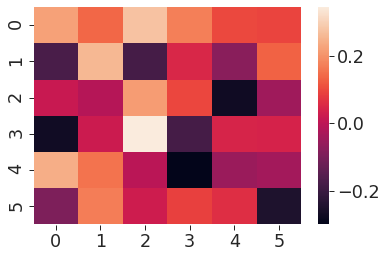

In [41]:
sns.heatmap(msm_model.prior.eigenvectors_left())

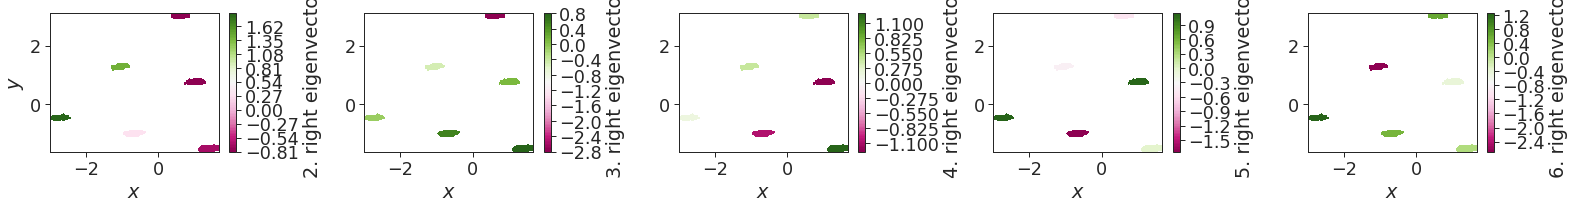

In [43]:
eigvec = msm_model.prior.eigenvectors_right()
fig, axes = plt.subplots(1, 5, figsize=(22, 3))
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *symtica_output.T[[0,1]], eigvec[dtrajs, i + 1], ax=ax, cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2), mask=True)
    ax.set_xlabel('$x$')
axes[0].set_ylabel('$y$')
fig.tight_layout()

In [44]:
pcca = msm_model.prior.pcca(n_states)

In [45]:
metastable_traj = [pcca.assignments[c_traj] for c_traj in dtrajs]

In [46]:
print('label\tstate\tπ\t\tG/kT')
p_list = []
for i, s in enumerate(pcca.sets):
    p = stationary_distribution[s].sum()
    print('{}\t{}\t{:f}\t{:f}'.format('d', i + 1, p, -np.log(p)))
    p_list.append(p)

p_list = np.array(p_list)

label	state	π		G/kT
d	1	0.093487	2.369931
d	2	0.099010	2.312534
d	3	0.138317	1.978211
d	4	0.172818	1.755517
d	5	0.222135	1.504471
d	6	0.274234	1.293775


In [47]:
highest_membership = pcca.metastable_distributions.argmax(1)
coarse_state_centers = cluster_centers[highest_membership]

In [48]:
from itertools import product

mfpt = np.zeros((n_states, n_states))
mfpt_std = np.zeros((n_states, n_states))

for i, j in product(range(n_states), repeat=2):
    stats_mfpt = msm_model.gather_stats("mfpt",
                                        A=pcca.sets[i],
                                        B=pcca.sets[j])
    mfpt[i, j] = stats_mfpt.mean

    mfpt_std[i, j] = stats_mfpt.std

In [49]:
inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

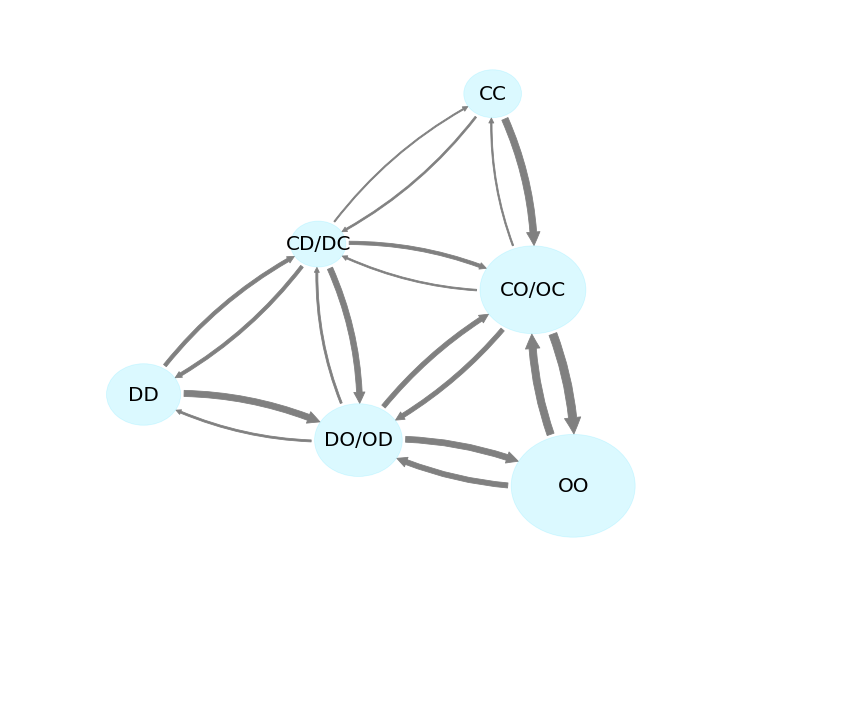

In [50]:
fig, ax = plt.subplots(figsize=(12, 10))
inverse_mfpt_direct = inverse_mfpt.copy()

inverse_mfpt_direct[0,5] = 0
inverse_mfpt_direct[5,0] = 0
inverse_mfpt_direct[1,2] = 0
inverse_mfpt_direct[2,1] = 0
inverse_mfpt_direct[1,3] = 0
inverse_mfpt_direct[3,1] = 0
inverse_mfpt_direct[1,5] = 0
inverse_mfpt_direct[5,1] = 0
inverse_mfpt_direct[2,4] = 0
inverse_mfpt_direct[4,2] = 0
inverse_mfpt_direct[2,5] = 0
inverse_mfpt_direct[5,2] = 0

pyemma.plots.plot_network(
    inverse_mfpt_direct,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.0f',
    arrow_labels=None,
    arrow_scale=2,
    state_colors='#3cdfff2f',
    state_scale=2,
    state_sizes=p_list ** 1.5,
    size=20,
    show_frame=False,
    state_labels=['CD/DC', 'CC', 'DD', 'DO/OD', 'CO/OC', 'OO'],
    ax=ax)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
fig.tight_layout()
plt.savefig('assets/dimer_network.pdf', dpi=300, transparent=True)

In [51]:
transition_mean = msm_model.gather_stats('transition_matrix').mean

In [52]:
transition_std = msm_model.gather_stats('transition_matrix').std

In [53]:
transition_mean

array([[0.28039408, 0.        , 0.46013157, 0.10367767, 0.13792236,
        0.01787432],
       [0.        , 0.49176763, 0.        , 0.22472639, 0.        ,
        0.28350598],
       [0.37272725, 0.        , 0.39706782, 0.23020493, 0.        ,
        0.        ],
       [0.13328225, 0.17976918, 0.3652581 , 0.20188807, 0.        ,
        0.1198024 ],
       [0.30961008, 0.        , 0.        , 0.        , 0.59687991,
        0.09351001],
       [0.04250967, 0.41936844, 0.        , 0.22142269, 0.09896782,
        0.21773139]])

In [55]:
transition_std

array([[0.00641361, 0.        , 0.00765516, 0.00366987, 0.0053969 ,
        0.00161749],
       [0.        , 0.01072789, 0.        , 0.00772153, 0.        ,
        0.00838623],
       [0.00798465, 0.        , 0.008409  , 0.00608302, 0.        ,
        0.        ],
       [0.0052816 , 0.0067151 , 0.00726531, 0.00938086, 0.        ,
        0.00633007],
       [0.01028099, 0.        , 0.        , 0.        , 0.01237448,
        0.0063389 ],
       [0.00402712, 0.01241461, 0.        , 0.00883159, 0.00618512,
        0.01158389]])